## The data in the table below are assumed to obey a model of the form $y_{i,j} = e_{i,j}exp(-bt_j)$ with $e_{i,j}$ assumed independent and identically distributed errors with $log(e_{i,j}) \sim N(\mu, \sigma^2)$ Estimate b, $\mu$ and $\sigma$ and assign appropriate errorbars to your estimates. 



| t   | y1 | y2 | y3 | y4 |
|-----|----|----|----|----|
| 1   |3.75|0.36|0.58|2.06|
| 2   |0.93|0.32|0.67|1.01|
| 3   |0.38|0.11|0.12|0.60|
| 4   |0.05|0.15|0.05|0.11|
| 5   |0.04|0.03|0.08|0.06|


### If we take our expected model $y_{i,j}$ and take the log, (call it $x_{i,j}$). 

#### The resulting model is : $x_{i,j} = log(y_{i,j}) = log(e_{i,j}) - bt_j$ where $\langle  log(e_{i,j}) \rangle = \mu $ since $\mu$ is the average of the normalized distribution function.  

#### Therefore, since $\langle  log(e_{i,j}) -\mu \rangle = 0$ and $log(e_{i,j}) = \mu + \epsilon_{i,j}$, then $\epsilon_{i,j} \sim N(0, \sigma^2)$ 


### Finally, $x_{i,j} = \mu - bt_j - \epsilon_{i,j}$

### This is a familiar problem, we can use projection to solve

In [2]:
import numpy as np

### We can define the design matrix as:

In [4]:
#define N=20 as the number of data points
N=20
#define the first column of design matrix as 20 1's
column1= np.ones((N,1))

t = np.array([1.0,2.0,3.0,4.0,5.0])
column2 = np.tile(t,4).reshape(20,1)

#concatenate the two columns to form the design matrix
A = np.hstack((column1, column2))

### We must define $\vec{\beta}$ as
$
\vec{\beta} = \begin{bmatrix}
\mu \\
b \\
\end{bmatrix}
$

Where $\mu$ is the y-intercept and $b$ is the slope

#### First, the prior probability is: $prob(\mu, b,\sigma) \propto \frac{1}{\sigma}$

#### Next, the likelihood function is:  $prob(\vec{y}|\mu, b, \sigma) \propto \frac{1}{\sigma^{20}} \exp(-\frac{1}{2\sigma^2}(\vec{y}-\matrix{A}\vec{\beta})^T (\vec{y}-\matrix{A}\vec{\beta}))$

#### Therefore, the posterior is: $prob(\mu, b, \sigma | \vec{y}) \propto \frac{1}{\sigma^{21}} exp(-\frac{1}{2\sigma^2}(\vec{y}-\matrix{A}\vec{\beta})^T (\vec{y}-\matrix{A}\vec{\beta}))$

### After taking the log of the posterior probability function and taking the derivative with respect to $\vec{\beta}$ at $\hat{\beta}$ and setting equal to zero as we have in previous problems. We get that $\hat{\beta} = (\matrix{A^T}\cdot\matrix{A})^{-1} A^{T} \cdot \vec{y}$

#### Let's compute this below to solve for $\hat{\beta}$ giving us values for $\mu$ and $b$

In [57]:
#define vector y with data points

y = np.array([3.75, 0.93, 0.38, 0.05, 0.04, 0.36, 0.32, 0.11, 0.15, 0.03, 0.58, 0.67, 0.12, 0.05, 0.08, 2.06, 1.01, 0.60, 0.11, 0.06])

#compute the inverse of Atranspose times A

AAinverse = np.linalg.inv(np.transpose(A) @ A)

#compute Atranspose times y vector
At_y = np.transpose(A) @ y 

beta_hat = AAinverse @ At_y

mu = beta_hat[0]
b = beta_hat[1]

print("the slope is:",beta_hat[1], "the y-intercept is",beta_hat[0])

the slope is: -0.3912500000000001 the y-intercept is 1.746750000000001


### Now we have to estimate the error associated with the projected model. To do this we must take the derivative of the log of the posterior probability with respect to $\sigma$ at $\hat{\sigma}$ and set it equal to zero. 

### This gives us the following result: $\hat{\sigma}^2 = \frac{(\vec{y}-\matrix{A}\hat{\beta})^T (\vec{y}-\matrix{A}\hat{\beta})}{21}$

In [68]:
N=20
residuals = y - A @ beta_hat
sigma_squared = (np.transpose(residuals) @ residuals)/(N+1)
sigma = np.sqrt(sigma_squared)

In [69]:
print("sigma hat squared is:", sigma_squared)
print("sigma hat, the standard deviation is:", np.sqrt(sigma_squared))

sigma hat squared is: 0.4334170238095238
sigma hat, the standard deviation is: 0.6583441530153692


In [74]:
e = 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-1*(y)**2/(2*sigma_squared))

print('e is the array of errorbars:', e)

e is the array of errorbars: [5.45722966e-08 2.23424905e-01 5.12992379e-01 6.04233156e-01
 6.04860833e-01 5.21826217e-01 5.38459977e-01 5.97578322e-01
 5.90451605e-01 6.05349478e-01 4.11070735e-01 3.61037806e-01
 5.95994849e-01 6.04233156e-01 6.01520738e-01 4.53274693e-03
 1.86798971e-01 4.00030100e-01 5.97578322e-01 6.03466879e-01]


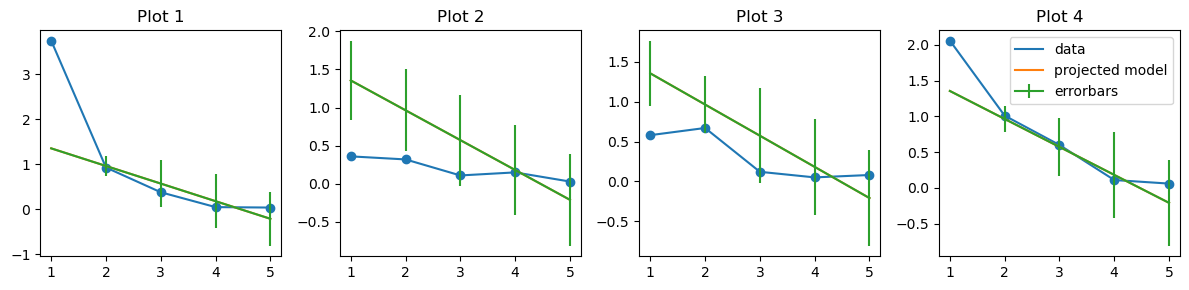

In [80]:
#plotting each graph with with the projected model

import matplotlib.pyplot as plt
import numpy as np

#define x and y1,y2,y3,y4
x = t
y1 = y[0:5]
y2 = y[5:10]
y3 = y[10:15]
y4 = y[15:20]

# Create subplots
fig, axs = plt.subplots(1, 4, figsize=(12, 3))

# Plot each graph
axs[0].scatter(x, y1)
axs[0].plot(x, y1, label='data')
axs[0].plot(x, mu + b*x, label='projected model')
axs[0].errorbar(x, mu + b*x, yerr=e[0:5], label='errorbars')
axs[0].set_title('Plot 1')
axs[1].scatter(x, y2)
axs[1].plot(x, y2, label='data')
axs[1].plot(x, mu + b*x, label='projected')
axs[1].errorbar(x, mu + b*x, yerr=e[5:10], label='errorbars')
axs[1].set_title('Plot 2')
axs[2].scatter(x, y3)
axs[2].plot(x, y3, label='data')
axs[2].plot(x, mu + b*x, label='projected model')
axs[2].errorbar(x, mu + b*x, yerr=e[10:15], label='errorbars')
axs[2].set_title('Plot 3')
axs[3].scatter(x, y4)
axs[3].plot(x, y4, label='data')
axs[3].plot(x, mu + b*x, label='projected model')
axs[3].errorbar(x, mu + b*x, yerr=e[15:20], label='errorbars')
axs[3].set_title('Plot 4')

# Adjust layout to prevent overlap
plt.legend()
plt.tight_layout()

# Show the plots
plt.show()


### Probability density function for $\mu$ 

#### $prob(\mu | \vec{y}) = \int_{-\infty}^{\infty} db \int_{-\infty}^{\infty} prob(\beta, \sigma | \vec{y}) $

taking the log of this we get

#### $log(prob(\mu | \vec{y})) = -\frac{1}{2(N-k+1)} log(\nu+(\mu-\hat{\mu})^2/C(1,1))$ where $\nu = N-k, \matrix{H} = S^2 \matrix{A}^T\matrix{A}, \matrix{C}=\matrix{H}^{-1}, S^2=\frac{e^Te}{\nu}$